In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime as dt

In [2]:
df=pd.read_csv("supermarket_sales.csv")

In [3]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.isnull().sum().sort_values(ascending=False)

Invoice ID                 0
Total                      0
gross income               0
gross margin percentage    0
cogs                       0
Payment                    0
Time                       0
Date                       0
Tax 5%                     0
Branch                     0
Quantity                   0
Unit price                 0
Product line               0
Gender                     0
Customer type              0
City                       0
Rating                     0
dtype: int64

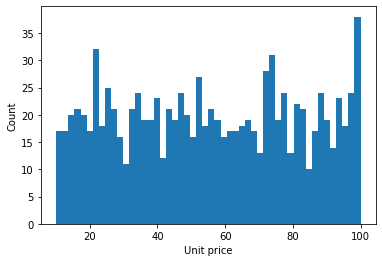

In [7]:
plt.hist(df["Unit price"], bins=50)
plt.xlabel('Unit price')
plt.ylabel('Count')
plt.show()

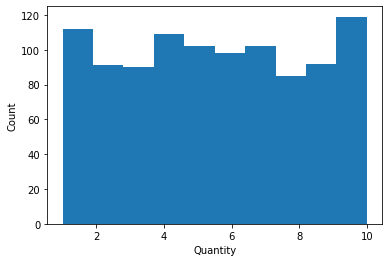

In [8]:
plt.hist(df["Quantity"])
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

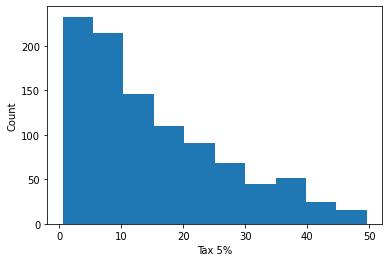

In [9]:
plt.hist(df["Tax 5%"])
plt.xlabel('Tax 5%')
plt.ylabel('Count')
plt.show()

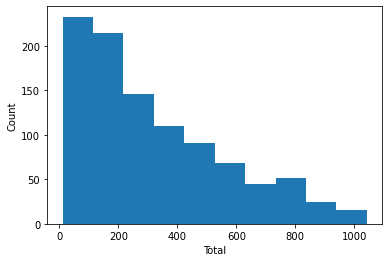

In [10]:
plt.hist(df["Total"])
plt.xlabel('Total')
plt.ylabel('Count')
plt.show()

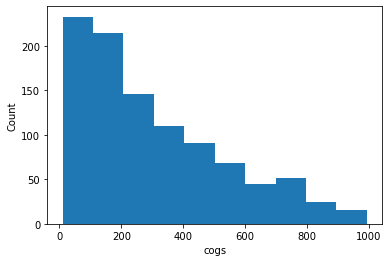

In [11]:
plt.hist(df["cogs"])
plt.xlabel('cogs')
plt.ylabel('Count')
plt.show()

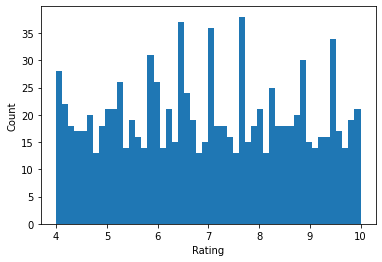

In [12]:
plt.hist(df["Rating"],bins=50)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


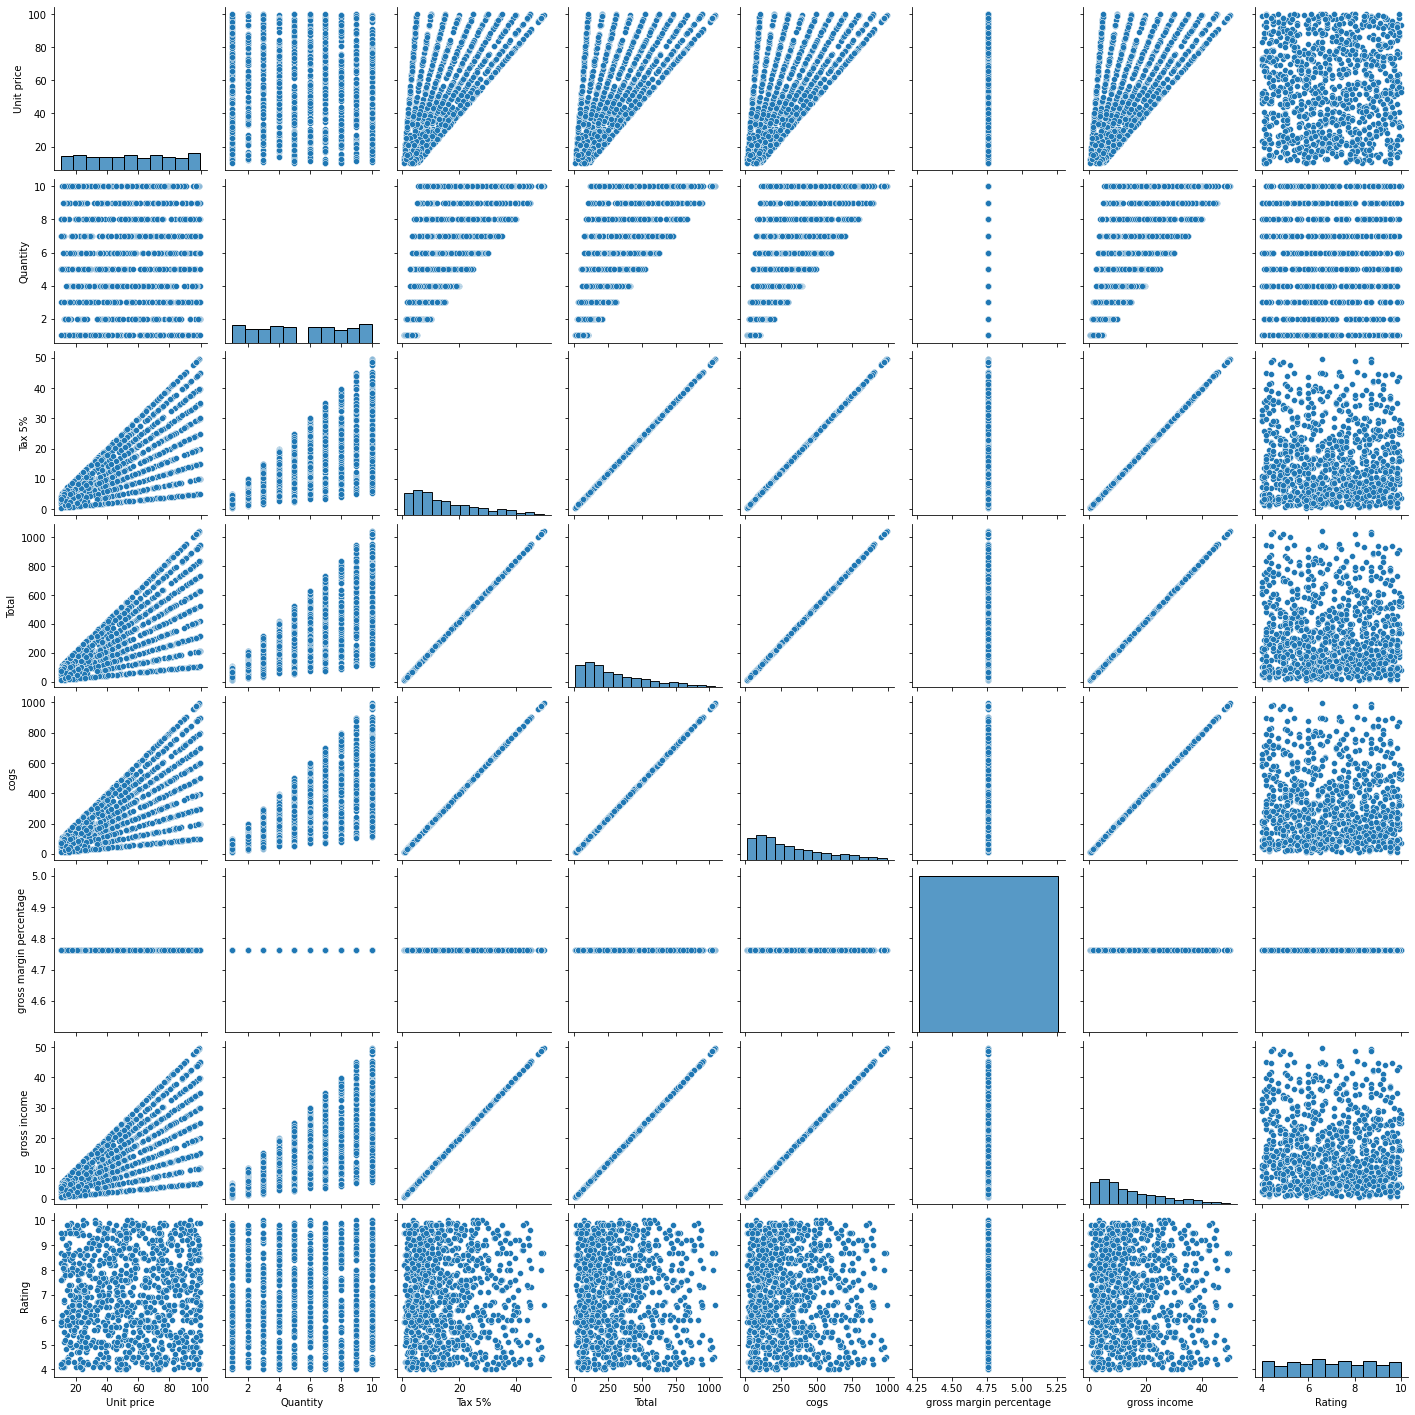

In [14]:
sns.pairplot(df)

<AxesSubplot:>

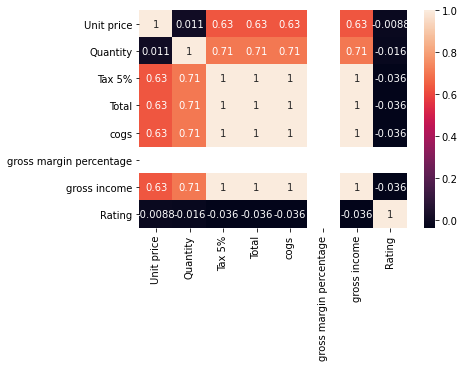

In [15]:
sns.heatmap(df.corr(), annot=True)

In [16]:
index_cogs=df[df['cogs']>3*df['cogs'].std()+100].index
df=df.drop(index_cogs,axis=0)

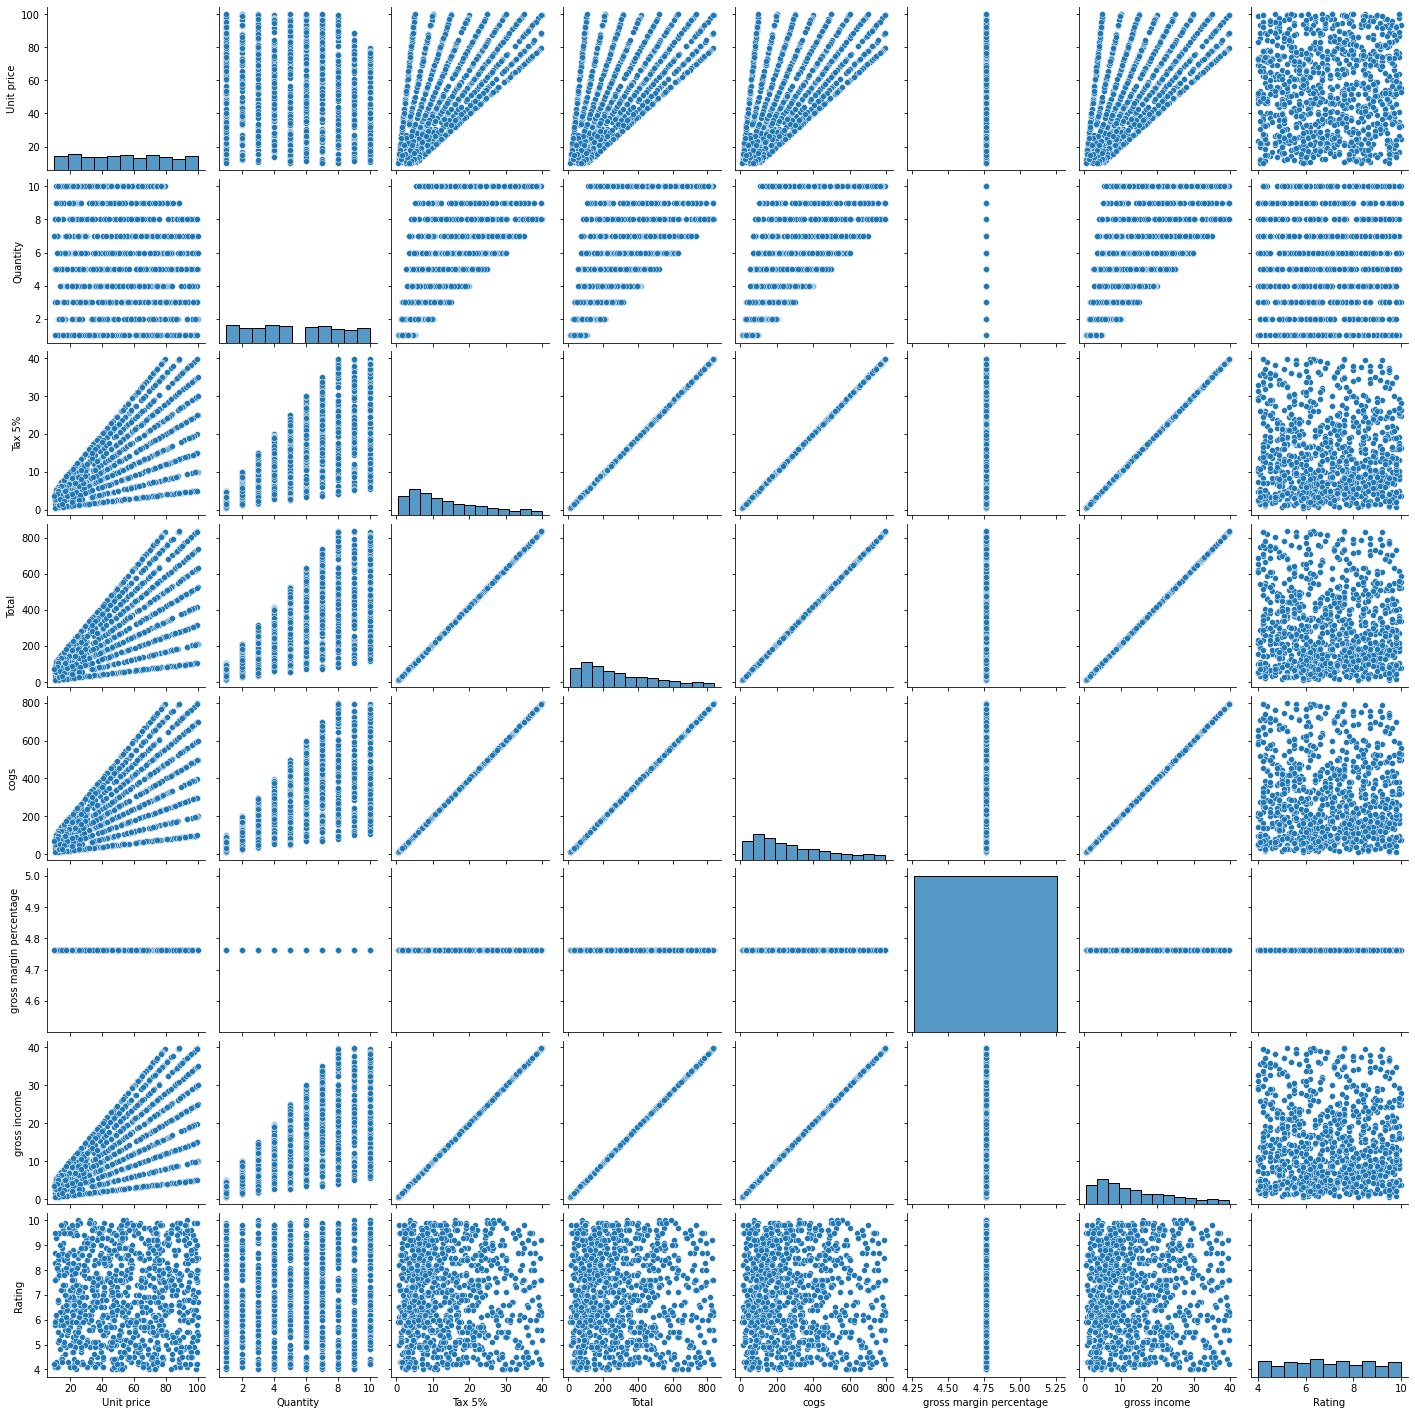

In [17]:
sns.pairplot(df)

<AxesSubplot:>

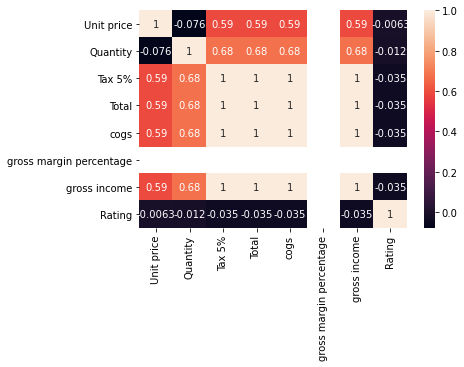

In [18]:
sns.heatmap(df.corr(), annot=True)

In [19]:
df['Date'] = pd.DatetimeIndex(df['Date'])
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [20]:
df=df.sort_values(by='Date').reset_index(drop=True)

In [21]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,2019-01-01,10:39,Credit card,435.66,4.761905,21.783,6.9
1,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0
2,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,2019-01-01,11:40,Ewallet,175.32,4.761905,8.766,5.0
3,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9
4,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,115-38-7388,C,Naypyitaw,Member,Female,Fashion accessories,10.18,8,4.072,85.512,2019-03-30,12:51,Credit card,81.44,4.761905,4.072,9.5
956,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.370,469.770,2019-03-30,10:18,Cash,447.40,4.761905,22.370,7.4
957,131-15-8856,C,Naypyitaw,Member,Female,Food and beverages,72.52,8,29.008,609.168,2019-03-30,19:26,Credit card,580.16,4.761905,29.008,4.0
958,642-61-4706,B,Mandalay,Member,Male,Food and beverages,93.40,2,9.340,196.140,2019-03-30,16:34,Cash,186.80,4.761905,9.340,5.5


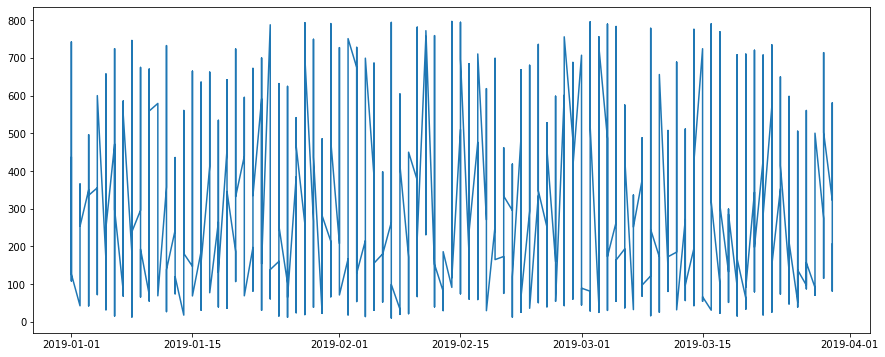

In [22]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['cogs'])

In [23]:
y=df["cogs"].values
result = adfuller(y)
print("ADF Statistics", result[0])
print("P value", result[1])

ADF Statistics -30.38699236662675
P value 0.0


In [24]:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['cogs'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -30.386992
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    959.000000
Critical Value (1%)             -3.437187
Critical Value (5%)             -2.864559
Critical Value (10%)            -2.568377
dtype: float64


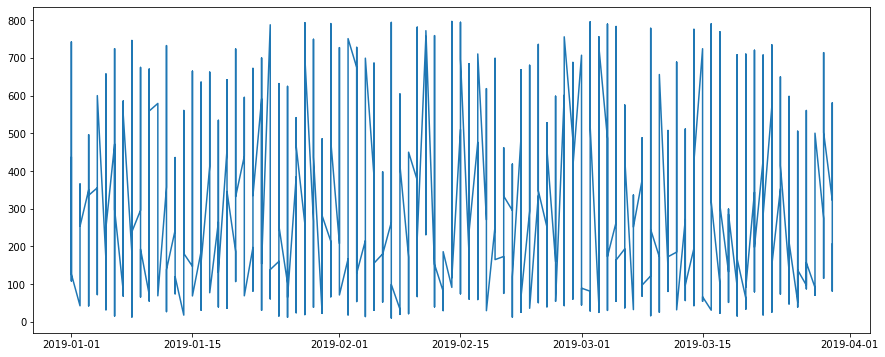

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['cogs'])

In [26]:
m  = SARIMAX(df['cogs'], order = (3, 1, 3), seasonal_order=(3, 1, 3, 6))
res = m.fit()

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              cogs   No. Observations:                  960
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 6)   Log Likelihood               -6450.252
Date:                           Tue, 06 Jul 2021   AIC                          12926.505
Time:                                   21:14:40   BIC                          12989.680
Sample:                                        0   HQIC                         12950.572
                                           - 960                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9716      0.034    -58.429      0.000      -2.038      -1.905
ar.L2         -0.9457      0.066    -14.252      0.000      -1.076      -0.816
ar.L3          0.0270      0.033      0.821      0.412      -0.037       0.091
ma.L1          0.9980      0.116      8.585      0.000       0.770       1.226
ma.L2         -0.9989      0.224     -4.467      0.000      -1.437      -0.561
ma.L3         -0.9990      0.111     -8.971      0.000      -1.217      -0.781
ar.S.L6       -1.8816      0.055    -34.212      0.000      -1.989      -1.774
ar.S.L12      -0.9018      0.081    -11.093      0.000      -1.061      -0.742
ar.S.L18       0.0482      0.034      1.411      0.158      -0.019       0.115
ma.S.L6        0.9314      0.135      6.898      0.000       0.667       1.196
ma.S.L12      -0.9294      0.153     -6.059      0.000      -1.230      -0.629
ma.S.L18      -0.9952      0.134     -7.442      0.000      -1.257      -0.733
sigma2      4.248e+04   1.57e-05    2.7e+09      0.000    4.25e+04    4.25e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                84.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.69
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.13e+24. Standard errors may be unstable.
"""

In [28]:
df['arima_predict'] = res.fittedvalues

No handles with labels found to put in legend.


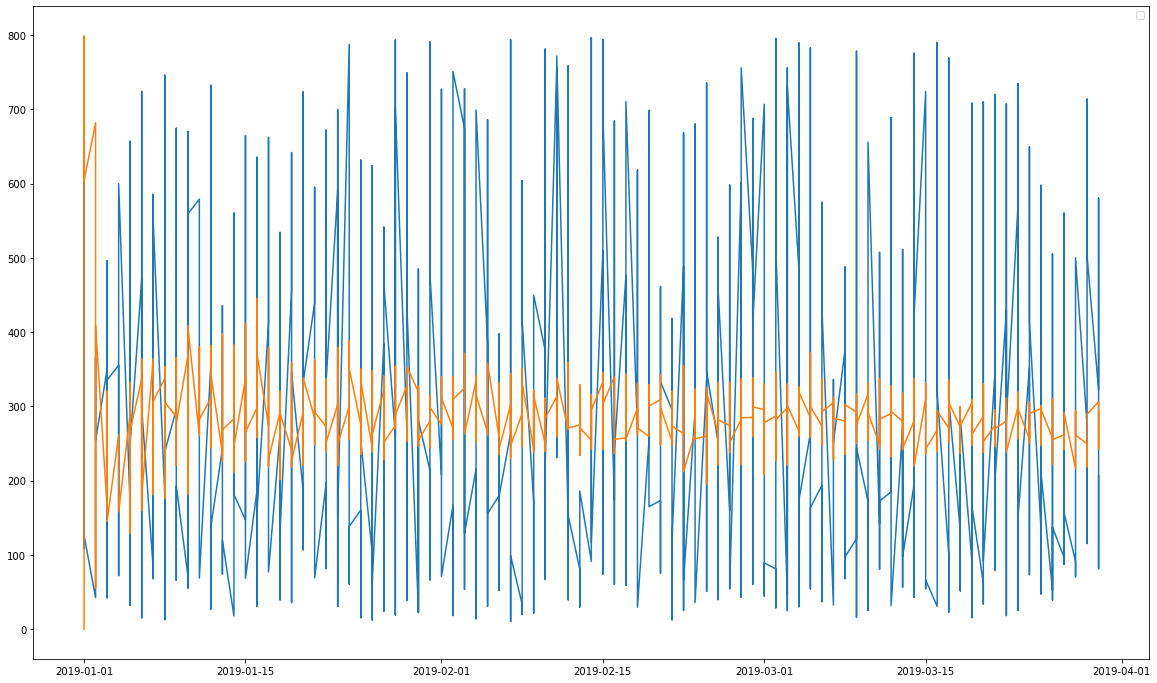

In [29]:
plt.figure(figsize=(20,12))
plt.plot(df['Date'].sort_values(), df['cogs'])
plt.plot(df['Date'].sort_values(), df['arima_predict'])
plt.legend()

In [30]:
forecast = res.predict(start=len(df), end=len(df) + 15)

In [31]:
forecast

960    279.294116
961    274.457869
962    302.379251
963    304.729733
964    239.396042
965    298.289828
966    233.883105
967    276.368346
968    268.066361
969    301.158919
970    257.213978
971    278.463392
972    273.587004
973    285.709781
974    280.342254
975    289.354938
Name: predicted_mean, dtype: float64

In [32]:
len(df['arima_predict'])

960

In [33]:
df['cogs'].append(forecast)

0      435.660000
1      125.740000
2      175.320000
3      108.160000
4      380.720000
          ...    
971    278.463392
972    273.587004
973    285.709781
974    280.342254
975    289.354938
Length: 976, dtype: float64

No handles with labels found to put in legend.


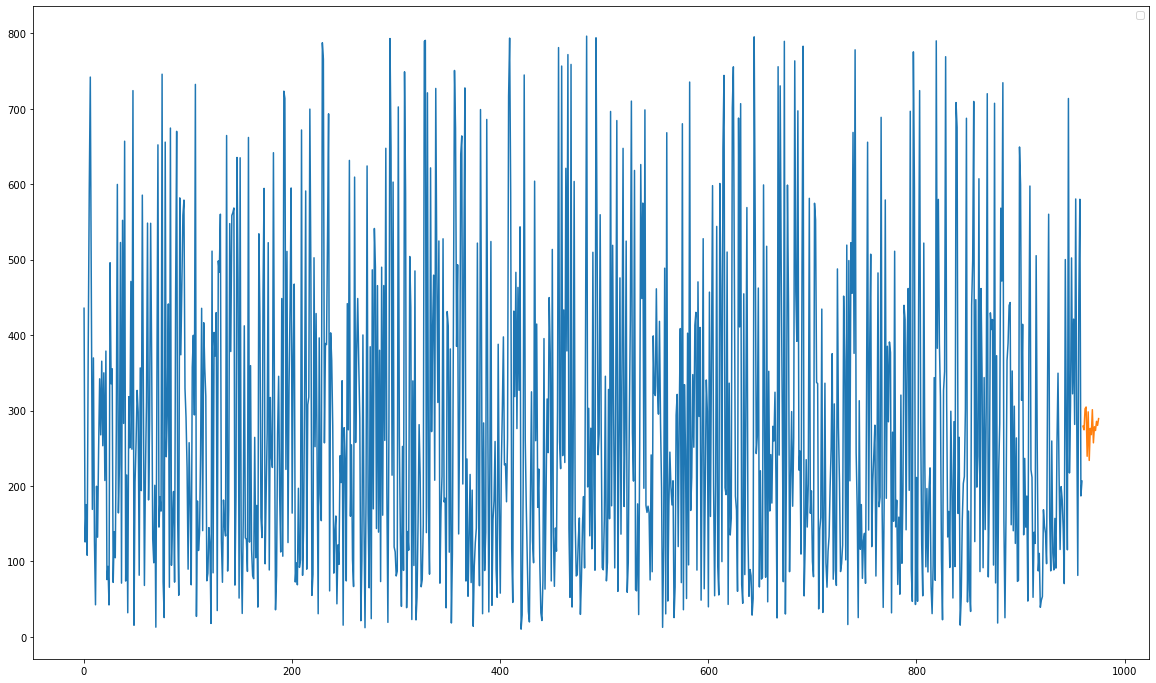

In [34]:
plt.figure(figsize=(20, 12))
plt.plot(df['cogs'])
plt.plot(forecast)
plt.legend()